<Figure size 1000x800 with 0 Axes>

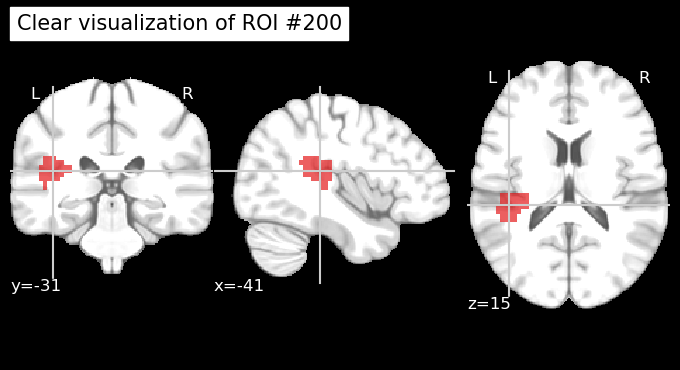

In [41]:
from nilearn import plotting, image
from nilearn.datasets import load_mni152_template
from nilearn.plotting import find_xyz_cut_coords
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.constrained_layout.use'] = True

# Load CC200 atlas
atlas_img = image.load_img(r'C:\ASD Data Science\ASD-Graph-Analysis\data\CC200.nii.gz')
atlas_data = atlas_img.get_fdata()

# Just specify one ROI clearly at a time:
roi_number = 200  # Change explicitly for each ROI you want clearly

# Mask explicitly just one ROI
roi_mask = (atlas_data == roi_number)
masked_roi_data = np.where(roi_mask, atlas_data, 0)

# Create masked image explicitly
masked_img = image.new_img_like(atlas_img, masked_roi_data)

# Get optimal coordinates clearly for this single ROI
cut_coords = find_xyz_cut_coords(masked_img)

# Plot clearly with a larger figure
plt.figure(figsize=(10, 8))

plotting.plot_roi(
    masked_img,
    bg_img=load_mni152_template(),
    title=f"Clear visualization of ROI #{roi_number}",
    draw_cross=True,
    annotate=True,
    cmap='Set1',
    colorbar=False,
    display_mode='ortho',
    cut_coords=cut_coords,
    dim=-0.5
)

plt.show()
